### The Goal is to predict whether a person has an income of more than 50K a year or not.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.shape

(32561, 13)

In [4]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  country         32561 non-null  object
 12  salary          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


### Data cleaning

In [11]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [8]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1835
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Self-emp-inc             1
Name: workclass, dtype: int64

In [9]:
df["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['workclass'].replace(' ?',0,inplace = True)
df['occupation'].replace(' ?',0,inplace = True)
df['country'].replace(' ?',0,inplace = True)

In [14]:
df['workclass'].replace(0,np.nan,inplace = True)
df['occupation'].replace(0,np.nan,inplace = True)
df['country'].replace(0,np.nan,inplace = True)

In [15]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [16]:
df["workclass"].value_counts()

 Private             24531
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Self-emp-inc             1
Name: workclass, dtype: int64

In [18]:
df.drop(['education','relationship'],axis = 1,inplace=True)

In [19]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'country',
       'salary'],
      dtype='object')

In [41]:
df.rename(columns={'sex':'Gender'},inplace=True)

In [23]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### Analyze data 


#### Age

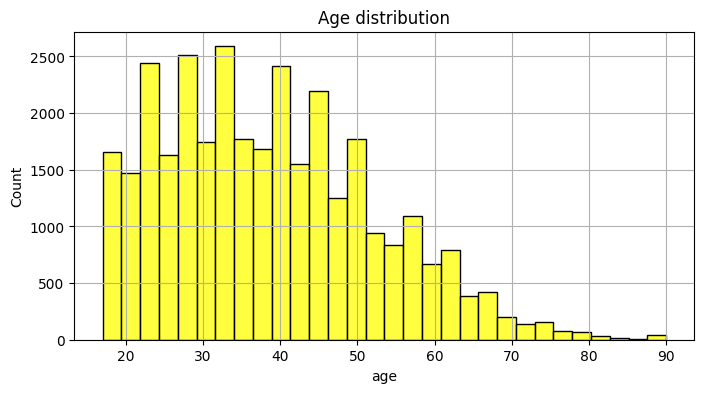

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],color='yellow', bins=30)
plt.grid(True)
plt.title('Age distribution')
plt.show()

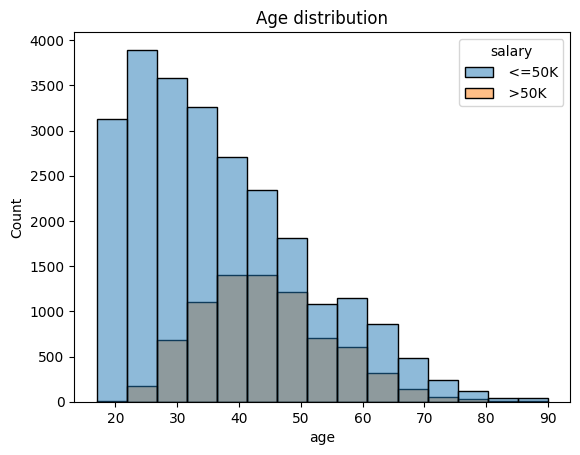

In [12]:
sns.histplot(x=df['age'],hue=df['salary'],color='green',bins=15)
plt.title('Age distribution')
plt.show()

From the graph we can see that in the age group 0-20 there isn't any entry of salary greater than 50k, same goes with the group greater than 75 years.

#### Workclass

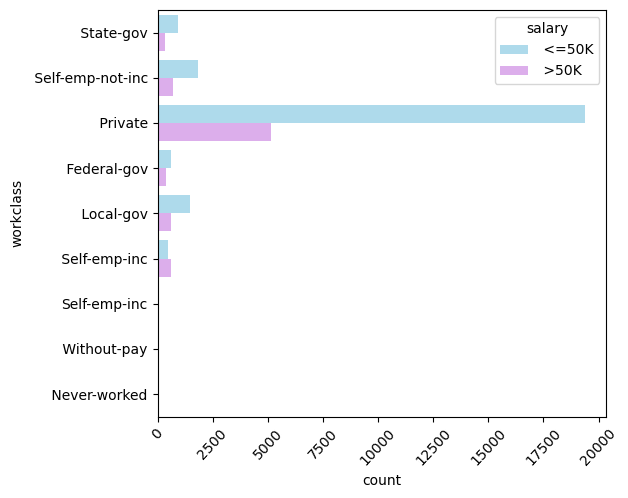

In [28]:
sns.countplot(y=df['workclass'], hue = df['salary'], palette=['#a4def5','#e1a4f5'])
plt.tight_layout()
plt.xticks(rotation = 47)
plt.show()

The majority of the individuals work in the private sector. The probabilities of making above 50,000 are similar among the work classes except for self-emp-inc and federal government. Federal government is seen as the most elite in the public sector, which most likely explains the higher chance of earning more than 50,000.

#### Occupation

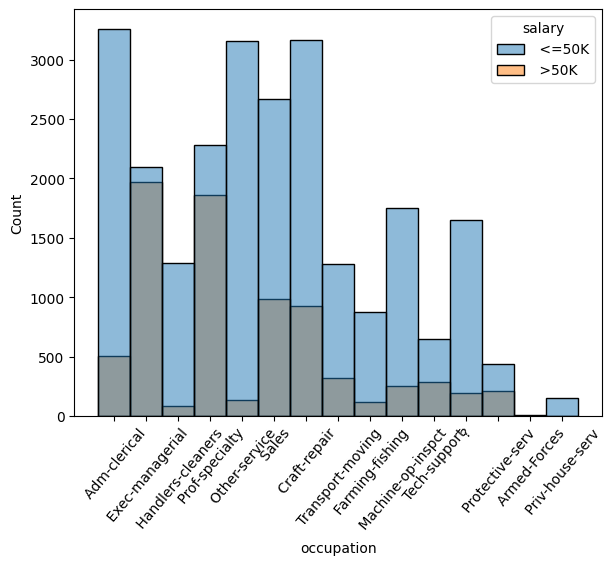

In [14]:
sns.histplot(x=df['occupation'], hue=df['salary'], color='green',bins=15)
plt.tight_layout()
plt.xticks(rotation = 50)
plt.show()

#### Gender

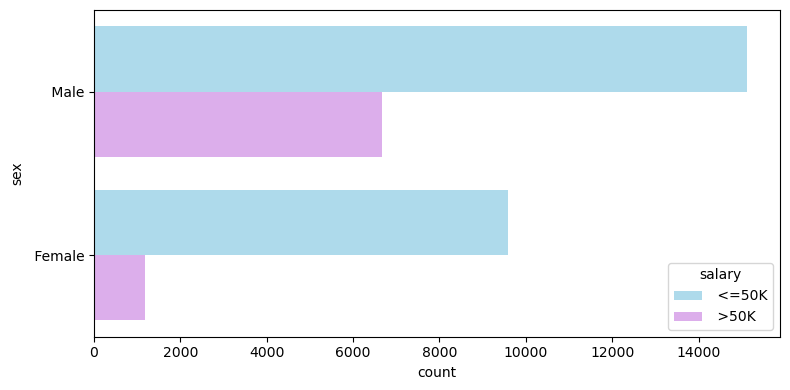

In [30]:
plt.figure(figsize = [8,4])
sns.countplot(y=df['Gender'],hue = df['salary'],palette=['#a4def5','#e1a4f5'])
plt.tight_layout()
plt.show()

The percentage of males who make greater than 50,000 is much greater than the percentage of females that make the same amount. This will certainly be a significant factor, and should be a feature considered in our prediction model.

#### Capital loss

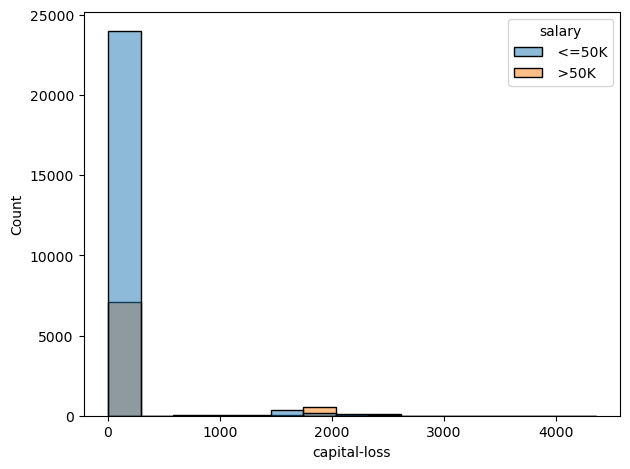

In [31]:
sns.histplot(x=df['capital-loss'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.show()

#### Hours per week

In [33]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

In [34]:
df['hours-per-week']=df['hours-per-week'].apply(hrs_edit)

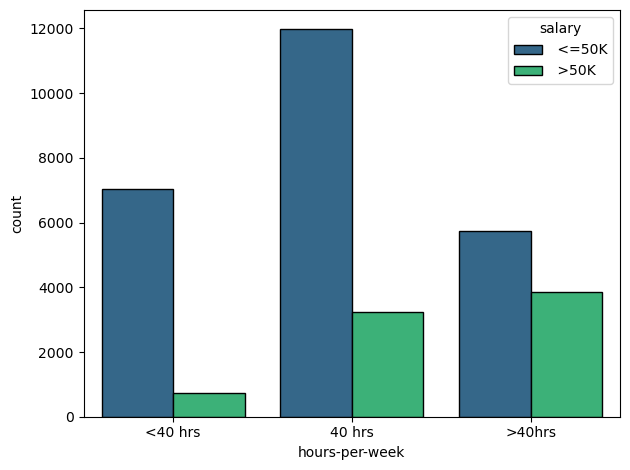

In [35]:
sns.countplot(x=df['hours-per-week'],hue=df['salary'],palette='viridis',
              saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.show()

The percentage of individuals making over 50,000 drastically decreases when less than 40 hours per week, and increases significantly when greater than 40 hours per week.

#### Country

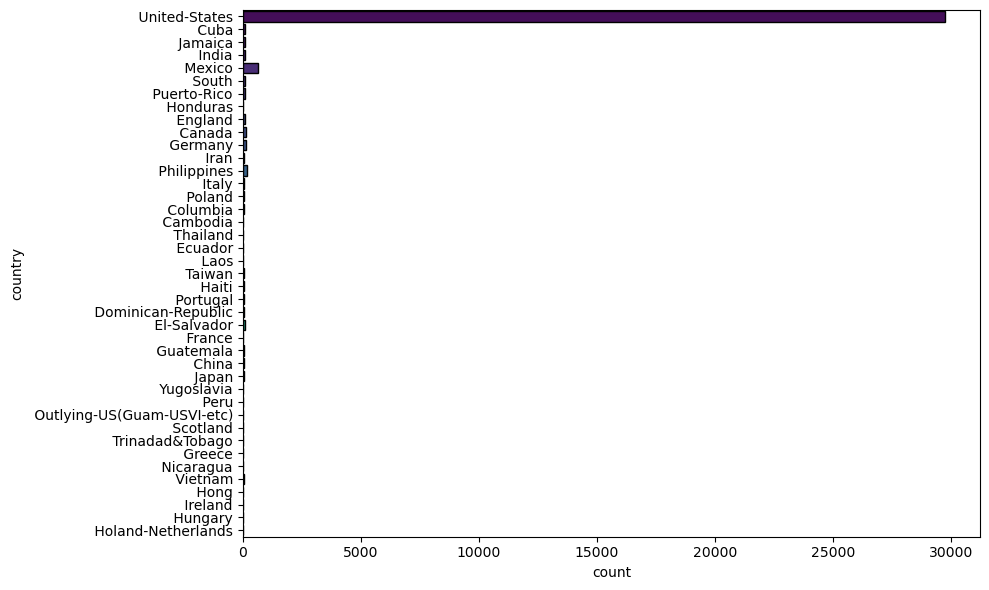

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()